In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_excel('ds_challenge_v2_1_data AS.xlsx', index_col=0)
df.shape

(54681, 10)

In [3]:
df.dtypes

city_name                       object
signup_os                       object
signup_channel                  object
signup_date             datetime64[ns]
bgc_date                datetime64[ns]
vehicle_added_date      datetime64[ns]
vehicle_make                    object
vehicle_model                   object
vehicle_year                   float64
first_completed_date    datetime64[ns]
dtype: object

In [4]:
# df.fillna('unknown', inplace=True)

In [5]:
df.head()

city_name    signup_os signup_channel signup_date   bgc_date  \
id                                                                
1     Strark      ios web           Paid  2016-01-02        NaT   
2     Strark      windows           Paid  2016-01-21        NaT   
3    Wrouver      windows        Organic  2016-01-11 2016-01-11   
4     Berton  android web       Referral  2016-01-29 2016-02-03   
5     Strark  android web       Referral  2016-01-10 2016-01-25   

   vehicle_added_date vehicle_make vehicle_model  vehicle_year  \
id                                                               
1                 NaT          NaN           NaN           NaN   
2                 NaT          NaN           NaN           NaN   
3                 NaT          NaN           NaN           NaN   
4          2016-02-03       Toyota       Corolla        2016.0   
5          2016-01-26      Hyundai        Sonata        2016.0   

   first_completed_date  
id                       
1                   NaT  
2                   NaT  
3                   NaT  
4            2016-02-03  
5                   NaT

# Data Cleaning and Exploratory Analysis

In [6]:
# 1 if signed up, 0 if not
df['target'] = 1
df.loc[df.first_completed_date.isnull(), 'target'] = 0
df.target.value_counts(normalize=True)

0    0.887767
1    0.112233
Name: target, dtype: float64

##### Distribution of target variable

Text(0,0.5,'Percent')

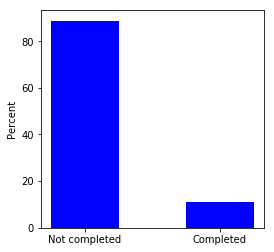

In [7]:
plt.figure(figsize=(4, 4))
plt.bar([0,1], df.target.value_counts(normalize=True)*100, width = 0.5, color='b')
plt.xticks([0, 1], ['Not completed', 'Completed'])
plt.ylabel('Percent')

##### Distribution of target variable based on city_name

In [8]:
df.city_name.value_counts()

Strark     29557
Berton     20117
Wrouver     5007
Name: city_name, dtype: int64

In [9]:
print('Overall')
print(df.target.value_counts(normalize=True))

for c in df.city_name.unique():
    print('\n', c, sum(df.city_name == c))
    print(df[df.city_name == c].target.value_counts(normalize=True))

Overall
0    0.887767
1    0.112233
Name: target, dtype: float64

 Strark 29557
0    0.890415
1    0.109585
Name: target, dtype: float64

 Wrouver 5007
0    0.907929
1    0.092071
Name: target, dtype: float64

 Berton 20117
0    0.878859
1    0.121141
Name: target, dtype: float64


##### Distribution of target variable based on signup_os

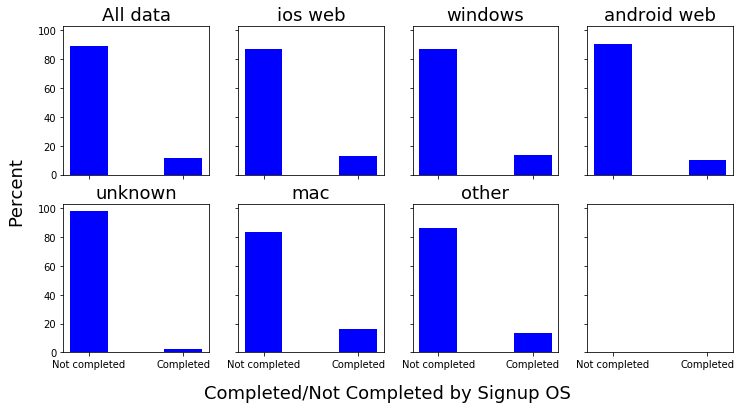

In [10]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2,4, sharex=True, sharey=True, figsize=(12, 6))
df['signup_os'].fillna('unknown', inplace=True)
ax1.bar([0,1], df.target.value_counts(normalize=True)*100, width = 0.4, color='b')
ax1.set_title('All data', fontsize=18)
for ind, signup in enumerate(df.signup_os.unique()):
    ax = globals()['ax'+str(ind+2)]
#     if pd.notnull(signup):
    dt = df[df.signup_os == signup].target.value_counts(normalize=True)*100
#     else:
#         dt = df[df.signup_os.isnull()].target.value_counts(normalize=True)*100
    ax.bar(dt.index, dt, width=0.4, color='b')
    ax.set_title(str(signup), fontsize=18)
    
plt.xticks([0, 1], ['Not completed', 'Completed'])
fig.text(0.5, 0.02, 'Completed/Not Completed by Signup OS', ha='center', fontsize=18)
fig.text(0.06, 0.5, 'Percent', va='center', rotation='vertical', fontsize=18);

##### Distribution of target variable based on signup_channel

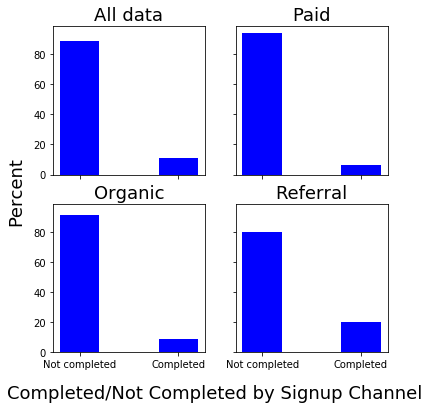

In [11]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, sharex=True, sharey=True, figsize=(6, 6))

ax1.bar([0,1], df.target.value_counts(normalize=True)*100, width = 0.4, color='b')
ax1.set_title('All data', fontsize=18)
for ind, signup in enumerate(df.signup_channel.unique()):
    ax = globals()['ax'+str(ind+2)]
    dt = df[df.signup_channel == signup].target.value_counts(normalize=True)*100
    ax.bar(dt.index, dt, width=0.4, color='b')
    ax.set_title(str(signup), fontsize=18)
    
plt.xticks([0, 1], ['Not completed', 'Completed'])
fig.text(0.5, 0.02, 'Completed/Not Completed by Signup Channel', ha='center', fontsize=18)
fig.text(0.02, 0.5, 'Percent', va='center', rotation='vertical', fontsize=18);

##### Distribution of target variable based on signup_weekday

In [12]:
df['signup_weekday'] = df['signup_date'].dt.dayofweek
print('Overall')
print(df.target.value_counts(normalize=True))

for c in df.signup_weekday.unique():
    print('\n', c, sum(df.signup_weekday == c))
    print(df[df.signup_weekday == c].target.value_counts(normalize=True))

Overall
0    0.887767
1    0.112233
Name: target, dtype: float64

 5 8106
0    0.895633
1    0.104367
Name: target, dtype: float64

 3 7479
0    0.881535
1    0.118465
Name: target, dtype: float64

 0 7953
0    0.876525
1    0.123475
Name: target, dtype: float64

 4 9167
0    0.899858
1    0.100142
Name: target, dtype: float64

 6 6311
0    0.910157
1    0.089843
Name: target, dtype: float64

 1 7889
0    0.872734
1    0.127266
Name: target, dtype: float64

 2 7776
0    0.879887
1    0.120113
Name: target, dtype: float64


##### Distribution of target variable based on signup_day

In [13]:
df['signup_day'] = df['signup_date'].dt.day
print('Overall')
print(df.target.value_counts(normalize=True))

for c in sorted(df.signup_day.unique()):
    print('\n', c, sum(df.signup_day == c))
    print(df[df.signup_day == c].target.value_counts(normalize=True))

Overall
0    0.887767
1    0.112233
Name: target, dtype: float64

 1 2282
0    0.946538
1    0.053462
Name: target, dtype: float64

 2 1814
0    0.898567
1    0.101433
Name: target, dtype: float64

 3 1886
0    0.897667
1    0.102333
Name: target, dtype: float64

 4 2460
0    0.862602
1    0.137398
Name: target, dtype: float64

 5 2489
0    0.864604
1    0.135396
Name: target, dtype: float64

 6 2207
0    0.87449
1    0.12551
Name: target, dtype: float64

 7 2078
0    0.883061
1    0.116939
Name: target, dtype: float64

 8 1788
0    0.869687
1    0.130313
Name: target, dtype: float64

 9 1665
0    0.887087
1    0.112913
Name: target, dtype: float64

 10 1614
0    0.918216
1    0.081784
Name: target, dtype: float64

 11 1991
0    0.882973
1    0.117027
Name: target, dtype: float64

 12 1747
0    0.864911
1    0.135089
Name: target, dtype: float64

 13 1718
0    0.87078
1    0.12922
Name: target, dtype: float64

 14 1671
0    0.874327
1    0.125673
Name: target, dtype: float64

 15 1595


##### Distribution of target variable based on number of days between signup and bgc

0    26759
1     6137
Name: target, dtype: int64


/home/tseidakhmetov/Desktop/predictions/venv/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


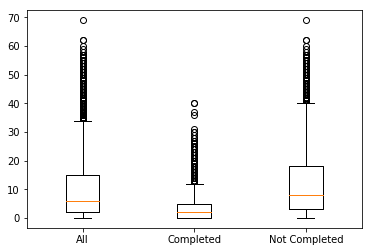

In [14]:
df['signup2bgc_days'] = df['bgc_date'] - df['signup_date']
df['signup2bgc_days'] = df['signup2bgc_days'].dt.days

subdf = df[df['signup2bgc_days'].notnull()]
print (subdf.target.value_counts())
ax = plt.boxplot([subdf['signup2bgc_days'], subdf[subdf.target == 1]['signup2bgc_days'], subdf[subdf.target == 0]['signup2bgc_days']]);
plt.xticks([1,2,3], ['All', 'Completed', 'Not Completed']);

##### Distribution of target variable based on number of days between signup and vehicle add date

0    7262
1    5872
Name: target, dtype: int64


/home/tseidakhmetov/Desktop/predictions/venv/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


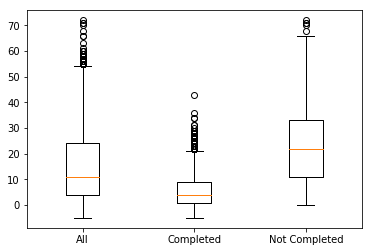

In [15]:
df['signup2vehadd_days'] = df['vehicle_added_date'] - df['signup_date']
df['signup2vehadd_days'] = df['signup2vehadd_days'].dt.days

subdf = df[df['signup2vehadd_days'].notnull()]
print (subdf.target.value_counts())
ax = plt.boxplot([subdf['signup2vehadd_days'], subdf[subdf.target == 1]['signup2vehadd_days'], subdf[subdf.target == 0]['signup2vehadd_days']]);
plt.xticks([1,2,3], ['All', 'Completed', 'Not Completed']);

# Modeling

In [16]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import itertools

/home/tseidakhmetov/Desktop/predictions/venv/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [17]:
import copy
df_original = df.copy()

In [18]:
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / sum(sum(cm))
#         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

##### Preprocess, split data to train-test sets

In [19]:
for c in ['city_name', 'signup_os', 'signup_channel', 'signup_weekday', 'signup_day', 'signup2vehadd_days', 'signup2bgc_days']:
    print(c, df[c].isnull().sum(), df[c].notnull().sum())

city_name 0 54681
signup_os 0 54681
signup_channel 0 54681
signup_weekday 0 54681
signup_day 0 54681
signup2vehadd_days 41547 13134
signup2bgc_days 21785 32896


In [20]:
le1 = LabelEncoder()
le1.fit(df['city_name'])
df['city_name'] = le1.transform(df['city_name']) 

le2 = LabelEncoder()
le2.fit(df['signup_os'])
df['signup_os'] = le2.transform(df['signup_os']) 

le3 = LabelEncoder()
le3.fit(df['signup_channel'])
df['signup_channel'] = le3.transform(df['signup_channel']) 

In [21]:
df.loc[df.signup2vehadd_days.isnull(), 'signup2vehadd_days'] = 999
df.loc[df.signup2bgc_days.isnull(), 'signup2bgc_days'] = 999

In [22]:
df.head()

city_name  signup_os  signup_channel signup_date   bgc_date  \
id                                                                
1           1          1               1  2016-01-02        NaT   
2           1          5               1  2016-01-21        NaT   
3           2          5               0  2016-01-11 2016-01-11   
4           0          0               2  2016-01-29 2016-02-03   
5           1          0               2  2016-01-10 2016-01-25   

   vehicle_added_date vehicle_make vehicle_model  vehicle_year  \
id                                                               
1                 NaT          NaN           NaN           NaN   
2                 NaT          NaN           NaN           NaN   
3                 NaT          NaN           NaN           NaN   
4          2016-02-03       Toyota       Corolla        2016.0   
5          2016-01-26      Hyundai        Sonata        2016.0   

   first_completed_date  target  signup_weekday  signup_day  signup2bgc_days  \
id                                                                             
1                   NaT       0               5           2            999.0   
2                   NaT       0               3          21            999.0   
3                   NaT       0               0          11              0.0   
4            2016-02-03       1               4          29              5.0   
5                   NaT       0               6          10             15.0   

    signup2vehadd_days  
id                      
1                999.0  
2                999.0  
3                999.0  
4                  5.0  
5                 16.0

In [23]:
x = df[['city_name', 'signup_os', 'signup_channel', 'signup_weekday', 'signup_day', 'signup2vehadd_days', 'signup2bgc_days']]
y = df['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [24]:
lr_model = LogisticRegressionCV(cv=5, n_jobs=3, random_state=2222)
lr_model = lr_model.fit(x_train, y_train)
# lr_model = lr_model.fit(x_train[:100], y_train[:100])

In [25]:
predicted_train = pd.DataFrame(lr_model.predict(x_train), index=x_train.index)
predicted_train.columns = ['pred']
print(predicted_train.pred.value_counts())
print(predicted_train.shape, y_train.shape)
predicted_train['true'] = y_train
predicted_train.replace(to_replace=[0,1], value=['Not Completed', 'Completed'], inplace=True)
predicted_train.head()

0    38102
1     5642
Name: pred, dtype: int64
(43744, 1) (43744,)


pred           true
id                                 
38483  Not Completed  Not Completed
43223      Completed      Completed
8618   Not Completed  Not Completed
13244  Not Completed  Not Completed
42215  Not Completed  Not Completed

Accuracy: 0.93
[[36926  1914]
 [ 1176  3728]]
Normalized confusion matrix


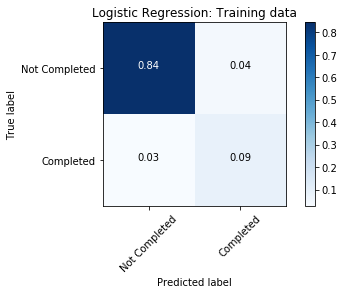

In [26]:
labels = ['Not Completed', 'Completed']
true_label = predicted_train.true
pred_label = predicted_train.pred
print('Accuracy:', round(accuracy_score(true_label, pred_label), 2))
cm = confusion_matrix(true_label, pred_label, labels)
print(cm)
plot_confusion_matrix(cm, labels, normalize=True, title='Logistic Regression: Training data', cmap=plt.cm.Blues)
# plt.savefig('all_alldata.png')
# print(len(sub_df))

In [27]:
predicted_test = pd.DataFrame(lr_model.predict(x_test), index=x_test.index)
predicted_test.columns = ['pred']
print(predicted_test.pred.value_counts())
print(predicted_test.shape, y_test.shape)
predicted_test['true'] = y_test
predicted_test.replace(to_replace=[0,1], value=['Not Completed', 'Completed'], inplace=True)
predicted_test.head()

0    9503
1    1434
Name: pred, dtype: int64
(10937, 1) (10937,)


pred           true
id                                 
52100  Not Completed  Not Completed
36411  Not Completed  Not Completed
36723  Not Completed  Not Completed
13947  Not Completed  Not Completed
38504  Not Completed  Not Completed

Accuracy: 0.92
[[9193  511]
 [ 310  923]]
Normalized confusion matrix


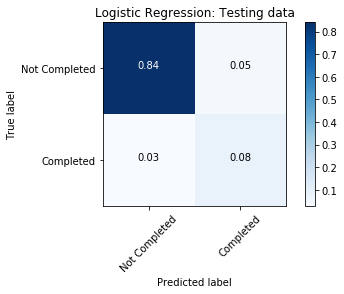

In [28]:
labels = ['Not Completed', 'Completed']
true_label = predicted_test.true
pred_label = predicted_test.pred
print('Accuracy:', round(accuracy_score(true_label, pred_label), 2))
cm = confusion_matrix(true_label, pred_label, labels)
print(cm)
plot_confusion_matrix(cm, labels, normalize=True, title='Logistic Regression: Testing data', cmap=plt.cm.Blues)
# plt.savefig('all_alldata.png')
# print(len(sub_df))

##### Extreme Gradient Boosting (XGBoost)

In [29]:
from xgboost.sklearn import XGBClassifier
from sklearn.grid_search import RandomizedSearchCV
import operator

/home/tseidakhmetov/Desktop/predictions/venv/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


##### XGBOOST hyperparameter search

In [35]:
# Hyperparameter Search
params = {  
    'n_estimators': range(80, 121, 10),
    'max_depth': range(5,20),
    'learning_rate': np.arange(0.01,0.3, 0.01),
    'colsample_bytree': np.arange(0.3, 1, 0.05),
    'subsample': np.arange(0.3, 1, 0.05),
    'gamma': range(0, 10)
}
iters = 20

xgbclass = XGBClassifier()

In [36]:
gs = RandomizedSearchCV(xgbclass, params, n_iter=iters, n_jobs=20, scoring='neg_mean_squared_error', cv=5, random_state=223)
gs.fit(x_train, y_train)
# gs.fit(x_train[:100], y_train[:100])

/home/tseidakhmetov/Desktop/predictions/venv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/tseidakhmetov/Desktop/predictions/venv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/tseidakhmetov/Desktop/predictions/venv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/tseidakhmetov/Desktop/predictions/venv/lib/python3.6/site-packages/sklear

/home/tseidakhmetov/Desktop/predictions/venv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/tseidakhmetov/Desktop/predictions/venv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/tseidakhmetov/Desktop/predictions/venv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/tseidakhmetov/Desktop/predictions/venv/lib/python3.6/site-packages/sklear

/home/tseidakhmetov/Desktop/predictions/venv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/tseidakhmetov/Desktop/predictions/venv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/tseidakhmetov/Desktop/predictions/venv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/tseidakhmetov/Desktop/predictions/venv/lib/python3.6/site-packages/sklear

/home/tseidakhmetov/Desktop/predictions/venv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/tseidakhmetov/Desktop/predictions/venv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/tseidakhmetov/Desktop/predictions/venv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/tseidakhmetov/Desktop/predictions/venv/lib/python3.6/site-packages/sklear

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params={}, iid=True, n_iter=20, n_jobs=20,
          param_distributions={'n_estimators': range(80, 121, 10), 'max_depth': range(5, 20), 'learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29]), 'c... , 0.45, 0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 ,
       0.85, 0.9 , 0.95]), 'gamma': range(0, 10)},
          pre_dispatch='2*n_jobs', random_state=223, refit=True,
        

In [37]:
xgb_model = gs.best_estimator_
xgb_model
# XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#        colsample_bytree=0.7999999999999998, gamma=8, learning_rate=0.05,
#        max_delta_step=0, max_depth=9, min_child_weight=1, missing=None,
#        n_estimators=90, n_jobs=1, nthread=None,
#        objective='binary:logistic', random_state=0, reg_alpha=0,
#        reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
#        subsample=0.5499999999999999)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7999999999999998, gamma=8, learning_rate=0.05,
       max_delta_step=0, max_depth=9, min_child_weight=1, missing=None,
       n_estimators=90, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.5499999999999999)

In [38]:
predicted_train = pd.DataFrame(xgb_model.predict(x_train), index=x_train.index)
predicted_train.columns = ['pred']
print(predicted_train.pred.value_counts())
print(predicted_train.shape, y_train.shape)
predicted_train['true'] = y_train
predicted_train.replace(to_replace=[0,1], value=['Not Completed', 'Completed'], inplace=True)
predicted_train.head()

0    38545
1     5199
Name: pred, dtype: int64
(43744, 1) (43744,)


/home/tseidakhmetov/Desktop/predictions/venv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


pred           true
id                                 
38483  Not Completed  Not Completed
43223      Completed      Completed
8618   Not Completed  Not Completed
13244  Not Completed  Not Completed
42215  Not Completed  Not Completed

Accuracy: 0.95
[[37510  1330]
 [ 1035  3869]]
Normalized confusion matrix


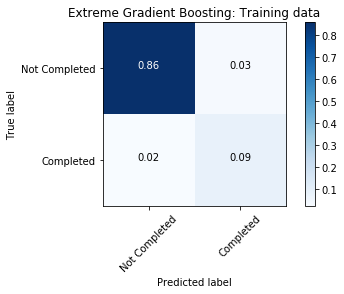

In [39]:
labels = ['Not Completed', 'Completed']
true_label = predicted_train.true
pred_label = predicted_train.pred
print('Accuracy:', round(accuracy_score(true_label, pred_label), 2))
cm = confusion_matrix(true_label, pred_label, labels)
print(cm)
plot_confusion_matrix(cm, labels, normalize=True, title='Extreme Gradient Boosting: Training data', cmap=plt.cm.Blues)
# plt.savefig('all_alldata.png')
# print(len(sub_df))

In [40]:
predicted_test = pd.DataFrame(xgb_model.predict(x_test), index=x_test.index)
predicted_test.columns = ['pred']
print(predicted_test.pred.value_counts())
print(predicted_test.shape, y_test.shape)
predicted_test['true'] = y_test
predicted_test.replace(to_replace=[0,1], value=['Not Completed', 'Completed'], inplace=True)
predicted_test.head()

0    9615
1    1322
Name: pred, dtype: int64
(10937, 1) (10937,)


/home/tseidakhmetov/Desktop/predictions/venv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


pred           true
id                                 
52100  Not Completed  Not Completed
36411  Not Completed  Not Completed
36723  Not Completed  Not Completed
13947  Not Completed  Not Completed
38504  Not Completed  Not Completed

Accuracy: 0.94
[[9333  371]
 [ 282  951]]
Normalized confusion matrix


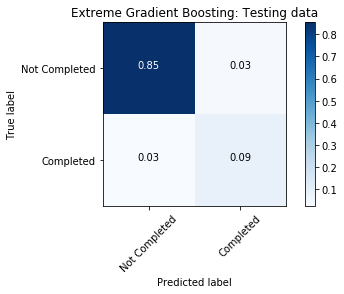

In [41]:
labels = ['Not Completed', 'Completed']
true_label = predicted_test.true
pred_label = predicted_test.pred
print('Accuracy:', round(accuracy_score(true_label, pred_label), 2))
cm = confusion_matrix(true_label, pred_label, labels)
print(cm)
plot_confusion_matrix(cm, labels, normalize=True, title='Extreme Gradient Boosting: Testing data', cmap=plt.cm.Blues)
# plt.savefig('all_alldata.png')
# print(len(sub_df))

In [42]:
feat_scores = dict(zip(x_test.columns, xgb_model.feature_importances_))
sorted_x = sorted(feat_scores.items(), key=operator.itemgetter(1), reverse=True)
sorted_x

[('signup2vehadd_days', 0.29913294),
 ('signup2bgc_days', 0.28323698),
 ('signup_os', 0.19942197),
 ('signup_day', 0.1083815),
 ('signup_channel', 0.07658959),
 ('city_name', 0.018786127),
 ('signup_weekday', 0.014450867)]

##### Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
params = {  
    'n_estimators': range(80, 121, 10),
    'max_features':np.arange(0.3, 0.8, 0.05),
    'max_depth':range(1, 11),
    'min_samples_split':range(2, 21)#,
#     'oob_score': True
}
    
iters = 20

rfclass = RandomForestClassifier()

In [45]:
gs = RandomizedSearchCV(rfclass, params, n_iter=iters, n_jobs=20, scoring='neg_mean_squared_error', cv=5, random_state=223)#rmsle_scorer)
gs.fit(x_train, y_train);
# gs.fit(x_train[:100], y_train[:100]);

In [46]:
rf_model = gs.best_estimator_
rf_model
# RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
#             max_depth=5, max_features=0.7, max_leaf_nodes=None,
#             min_impurity_decrease=0.0, min_impurity_split=None,
#             min_samples_leaf=1, min_samples_split=4,
#             min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
#             oob_score=False, random_state=None, verbose=0,
#             warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=0.7, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [47]:
feat_scores = dict(zip(x_test.columns, rf_model.feature_importances_))
sorted_x = sorted(feat_scores.items(), key=operator.itemgetter(1), reverse=True)
sorted_x

[('signup2vehadd_days', 0.8643764818286179),
 ('signup2bgc_days', 0.10679238486743929),
 ('signup_channel', 0.01980686845258703),
 ('signup_day', 0.005854139766265537),
 ('signup_os', 0.0022405910912401115),
 ('signup_weekday', 0.00048233382700982287),
 ('city_name', 0.0004472001668401301)]

In [52]:
predicted_train = pd.DataFrame(rf_model.predict(x_train), index=x_train.index)
predicted_train.columns = ['pred']
print(predicted_train.pred.value_counts())
print(predicted_train.shape, y_train.shape)
predicted_train['true'] = y_train
predicted_train.replace(to_replace=[0,1], value=['Not Completed', 'Completed'], inplace=True)
predicted_train.head()

0    38286
1     5458
Name: pred, dtype: int64
(43744, 1) (43744,)


pred           true
id                                 
38483  Not Completed  Not Completed
43223      Completed      Completed
8618   Not Completed  Not Completed
13244  Not Completed  Not Completed
42215  Not Completed  Not Completed

Accuracy: 0.95
[[37372  1468]
 [  914  3990]]
Normalized confusion matrix


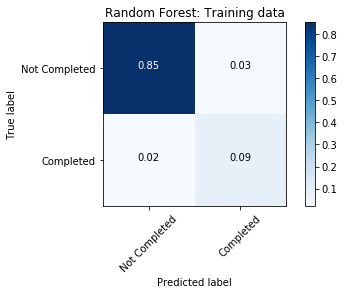

In [53]:
labels = ['Not Completed', 'Completed']
true_label = predicted_train.true
pred_label = predicted_train.pred
print('Accuracy:', round(accuracy_score(true_label, pred_label), 2))
cm = confusion_matrix(true_label, pred_label, labels)
print(cm)
plot_confusion_matrix(cm, labels, normalize=True, title='Random Forest: Training data', cmap=plt.cm.Blues)
# plt.savefig('all_alldata.png')
# print(len(sub_df))

In [54]:
predicted_test = pd.DataFrame(rf_model.predict(x_test), index=x_test.index)
predicted_test.columns = ['pred']
print(predicted_test.pred.value_counts())
print(predicted_test.shape, y_test.shape)
predicted_test['true'] = y_test
predicted_test.replace(to_replace=[0,1], value=['Not Completed', 'Completed'], inplace=True)
predicted_test.head()

0    9557
1    1380
Name: pred, dtype: int64
(10937, 1) (10937,)


pred           true
id                                 
52100  Not Completed  Not Completed
36411  Not Completed  Not Completed
36723  Not Completed  Not Completed
13947  Not Completed  Not Completed
38504  Not Completed  Not Completed

Accuracy: 0.94
[[9297  407]
 [ 260  973]]
Normalized confusion matrix


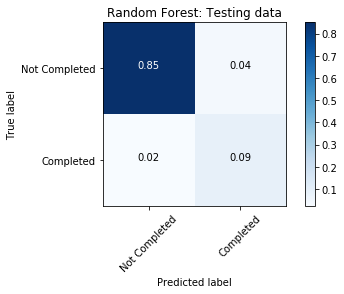

In [55]:
labels = ['Not Completed', 'Completed']
true_label = predicted_test.true
pred_label = predicted_test.pred
print('Accuracy:', round(accuracy_score(true_label, pred_label), 2))
cm = confusion_matrix(true_label, pred_label, labels)
print(cm)
plot_confusion_matrix(cm, labels, normalize=True, title='Random Forest: Testing data', cmap=plt.cm.Blues)
# plt.savefig('all_alldata.png')
# print(len(sub_df))